In [78]:
import os

import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
DATAFRAMES = os.path.join("..", "..", "..", "results", "dataframes", "")
FIGURES = os.path.join("..", "..", "..", "results", "figures", "")

# Data preprocessing

In [80]:
df = pd.read_csv(os.path.join(DATAFRAMES, "dataframe_LFR.csv"))
print(df.columns)

Index(['system', 'theta', 'embedding', 'mu', 't1', 't2', 'prob', 'accuracy',
       'auroc', 'pr', 'intercept', 'coef_distances', 'coef_degrees'],
      dtype='object')


In [81]:
df = df.melt(
    id_vars=["embedding", "theta", "mu", "t1", "intercept", "coef_distances", "coef_degrees"],
    value_vars=["accuracy", "auroc", "pr"],
    var_name="perftype", value_name="perfval"
).melt(
    id_vars=["embedding", "theta", "mu", "t1", "perftype", "perfval"],
    value_vars=["intercept", "coef_distances", "coef_degrees"],
    var_name="featuretype",
    value_name="featureval"
)

# Figures

## Performance

In [82]:
df_ = df.query("perftype == 'auroc'")
df_ = df_.query("embedding != 'Isomap'")
df_ = df_.query("mu == 0.1 & t1 == 2.1")
THETAS = sorted(df_["theta"].unique())

<Figure size 640x480 with 0 Axes>

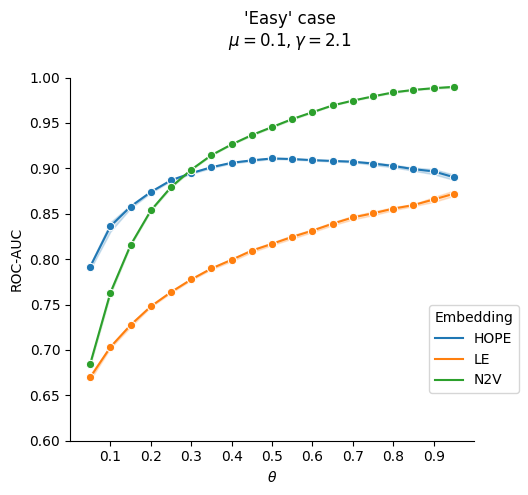

In [93]:
# Instantiate figure
plt.figure()

# Plot data
g = sns.relplot(
    data=df_, kind="line",
    x="theta", y="perfval",
    hue="embedding",
    marker="o",
)

# Adjust axes
g.set_axis_labels(r'$\theta$', 'ROC-AUC')
g.set(
    xlim=(0,1), xticks=THETAS[1::2],
    ylim=(0.6, 1), yticks=np.linspace(0.6, 1.0, 9))
g.tick_params(axis="x", labelrotation=0)
g.tick_params(axis="y", which="minor")

# Adjust subplots
g.fig.subplots_adjust(top=0.95)

# Adjust figure
# sns.despine(g.fig, offset=0.1, top=False, right=False, bottom=False, left=False)
g.fig.suptitle("'Easy' case\n" + r"$\mu=0.1, \gamma=2.1$")
sns.move_legend(g,
    loc="lower right", bbox_to_anchor=(0.9, 0.2),
    title="Embedding",
    frameon=True)

# Save to disk
g.tight_layout()
g.savefig(os.path.join(FIGURES, "figure_auroc-pfi_hue-embedding_data-LFR-mu-0.1_t1-2.1.png"), transparent=False, facecolor="white")

## Coefficients

In [88]:
df_ = df_.query("featuretype != 'intercept'")
df_["featureval"] = df_["featureval"].apply(lambda x: np.abs(x))
YMAX = df_["featureval"].max()

<Figure size 640x480 with 0 Axes>

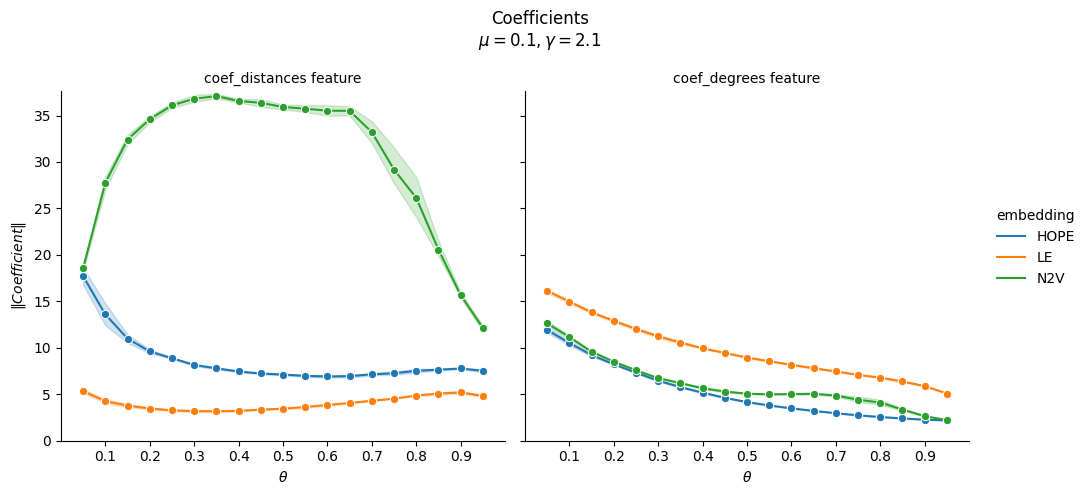

In [96]:
# Instantiate figure
plt.figure()

# Plot data
g = sns.relplot(
    data=df_, kind="line",
    x="theta", y="featureval",
    col="featuretype",
    hue="embedding",
    marker="o"
)

# # Adjust axes
g.set_axis_labels(r'$\theta$', r'$\| Coefficient \|$')
g.set(
    xlim=(0,1), xticks=THETAS[1::2],
    ylim=(0, YMAX),
)
g.tick_params(axis="x", labelrotation=0)


# Adjust subplots
g.set_titles(col_template="{col_name} feature")

# Adjust figure
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Coefficients\n" + r"$\mu=0.1, \gamma=2.1$")

# Save to disk
g.tight_layout()
g.savefig(os.path.join(FIGURES, "figure_coef-pfi_hue-embedding_col-feature_data-LFR-mu-0.1_t1-2.1.png"), transparent=False, facecolor="white")